# Week 1 Challenge Project
> Original author: Lyle Lalunio


**Hypothyroidism**, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone. It can cause a number of symptoms, such as poor ability to tolerate cold, a feeling of tiredness, constipation, depression, and weight gain. Occasionally, there may be swelling of the front part of the neck due to **goiter**. Untreated hypothyroidism during pregnancy can lead to delays in growth and intellectual development in the baby or cretinism.

Worldwide, too little **iodine** in the diet is the most common cause of hypothyroidism. In countries with enough iodine in the diet, the most common cause of hypothyroidism is the autoimmune condition **Hashimoto's thyroiditis**. Less common causes include previous treatment with radioactive iodine, injury to the hypothalamus or the anterior pituitary gland, certain medications, a lack of a functioning thyroid at birth, and previous thyroid surgery. The diagnosis of hypothyroidism, when suspected, can be confirmed with **blood tests** measuring thyroid-stimulating hormone (TSH) and thyroxine levels.

About one billion people around the world are estimated to be iodine deficient; however, it is unknown how often this results in hypothyroidism. In the United States, hypothyroidism occurs in nearly **5% of Americans over the age of 12**.

And that is why we iodize salt.

![thyroid-gland.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/thyroid-gland.png)

Doctors all around the world need our help to predict whether a patient has hypothyroidism. We have already **overspent** our budget to collect such comprehensive data on about 30 attributes for 2,800 patients—a good starting number, but a larger sample would certainly be preferred. Moving forward, however, we simply cannot afford to spend so much money on data collection. Therefore, we also need to determine **which attributes are the most meaningful** to the predictive models, and cut out the rest that don't contribute much.

The boss wants to see a **balanced** model that can predict with a **high sensitivity** and **high specificity** while using a ***low amount of features***. Collecting complete data such as this is very rare, very time-consuming, and often very expensive. By minimizing the number of features, we can optimize future data collection and decide what needs to be collected and what doesn't.

## Loading the data

Let's read the data into a Pandas DataFrame and look at the first 20 records.

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week1/allhypo.train.csv'
dataset = pd.read_csv(url)

df = pd.read_csv(url)
df.head(20)

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,negative.|1367
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,negative.|2534


In [ ]:
dataset.columns = ['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine', 'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium', 'Goiter', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH', 'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U', 'FTI Measured', 'FTI', 'TBG Measured', 'TBG', 'Referral Source', 'Class']

Great, looks like the data loaded in properly. Let's continue looking at some summary statistics on our data.

## Viewing summary statistics
The functions `describe()` and `info()` are your friends.

In [ ]:
# Output high-level column statistics
dataset.describe()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,...,2,218,2,139,2,210,1,1,5,2800
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative.|3733
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,...,2616,184,2503,297,2505,295,2800,2800,1632,1


In [ ]:
# Output information about the data including the index dtype and column dtypes, non-null values and memory usage
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2800 non-null   object
 1   Sex                        2800 non-null   object
 2   On Thyroxine               2800 non-null   object
 3   Query on Thyroxine         2800 non-null   object
 4   On Antithyroid Medication  2800 non-null   object
 5   Sick                       2800 non-null   object
 6   Pregnant                   2800 non-null   object
 7   Thyroid Surgery            2800 non-null   object
 8   I131 Treatment             2800 non-null   object
 9   Query Hypothyroid          2800 non-null   object
 10  Query Hyperthyroid         2800 non-null   object
 11  Lithium                    2800 non-null   object
 12  Goiter                     2800 non-null   object
 13  Tumor                      2800 non-null   object
 14  Hypopitu

Note the data types are all objects—even columns that are obviously numeric like `Age`. This is because there are "?" values for some of the cells, making Pandas interpret these columns as `non-null` objects (instead of `int`, for example).

## Data cleaning

To start, let's make all the **numerical columns** contain the correct type of values and change the dtype of those columns to `numeric`. Let's also replace all those **question marks** with `np.nan`.

In [ ]:
import numpy as np

dataset.replace(to_replace = "?", value = np.nan, inplace = True)

In [ ]:
# Identify columns by what time of data they hold
# Identify columns by what time of data they hold

numeric_columns = ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']


# Categorical columns are everything else (minus 'Class')
categorical_columns = dataset.columns.drop(numeric_columns).drop('Class') # <-- YOUR CODE HERE

# Convert numeric columns from strings to numbers
### YOUR CODE HERE

for col in numeric_columns:
    dataset[col] = pd.to_numeric(dataset[col])

# Print statement for sanity check
print('Numerical Columns:', numeric_columns)
print('Categorical Columns:',categorical_columns)

dataset.head(10)

Numerical Columns: ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
Categorical Columns: Index(['Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goiter', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured',
       'T3 Measured', 'TT4 Measured', 'T4U Measured', 'FTI Measured',
       'TBG Measured', 'Referral Source'],
      dtype='object')


,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative.|2807
5,18.0,F,t,f,f,f,f,f,f,f,...,t,183.0,t,1.30,t,141.0,f,NaN,other,negative.|3434
6,59.0,F,f,f,f,f,f,f,f,f,...,t,72.0,t,0.92,t,78.0,f,NaN,other,negative.|1595
7,80.0,F,f,f,f,f,f,f,f,f,...,t,80.0,t,0.70,t,115.0,f,NaN,SVI,negative.|1367
8,66.0,F,f,f,f,f,f,f,f,f,...,t,123.0,t,0.93,t,132.0,f,NaN,SVI,negative.|1787
9,68.0,M,f,f,f,f,f,f,f,f,...,t,83.0,t,0.89,t,93.0,f,NaN,SVI,negative.|2534


Hmm, still looks like the `TBG` column is unfilled, implying it was empty to begin with. Let's get rid of this column then (and make sure to get rid of it in your list of numeric columns too!)

In [ ]:
## YOUR CODE HERE
dataset.drop('TBG', axis=1, inplace = True)
numeric_columns.remove('TBG')

We also want to drop columns that do not contain useful information (all 2,800 data points have the same value) like `TBG Measured`, which you then want to remove from your list of categorical columns too.

In [ ]:
dataset.drop('TBG Measured', axis=1, inplace=True)
categorical_columns = categorical_columns.drop('TBG Measured')

All right, let's take a look now at the info of *just the numeric columns* in the dataset:

In [ ]:
df[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     2800 non-null   object
 1   TSH     2800 non-null   object
 2   T3      2800 non-null   object
 3   TT4     2800 non-null   object
 4   T4U     2800 non-null   object
 5   FTI     2800 non-null   object
dtypes: object(6)
memory usage: 131.4+ KB


Perfect, now let's move onto fixing that `Class` feature. According to the note the data collectors included with this data, the `".|####"` refers to a patient number and is not necessarily relevant for our purposes here.

Here's code we've already written up using regular expressions:

In [ ]:
# Import regular expression package
import re

# Define the regular expression for the ".|####" part of dataset['class']

regex_pattern = ( "\."   # looks for the period...
                  "\|"   # followed by a pipe...
                  "\d+") # followed by one or more digit

for index, row in dataset.iterrows():
    
    # Substitute instances of our regex_pattern for an empty string
    new_class = re.sub(regex_pattern, '', row['Class'])
    dataset.loc[index,'Class']=new_class

dataset.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative


In [ ]:
(lambda: DeepnoteChart(dataset, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"scale":{"type":"linear"},"aggregate":"count"},"y":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Class","scale":{"type":"linear"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(dataset, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"scale":{"type":"linear"},"aggregate":"count"},"y":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Class","scale":{"type":"linear"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

Let's run the `describe()` function on just the `"Class"` column.

In [ ]:
df['Class'].describe()

count               2800
unique              2800
top       negative.|3733
freq                   1
Name: Class, dtype: object

It looks like there are 4 unique classification values!

Display all the unique values in the `Class` column.

In [ ]:
dataset['Class'].value_counts()

Class
negative                   2580
compensated hypothyroid     154
primary hypothyroid          64
secondary hypothyroid         2
Name: count, dtype: int64

Let's make this response variable **binary** for now. If you finish this classification task early, try the **multiclass** classifier with all 4 values!

In [ ]:
# Change all non-negative classes to the positive class

#dataset['Class'] = dataset['Class'].apply(lambda x: 0 if x=='negative' else 1)
#dataset['Class'] = pd.to_numeric(dataset['Class'])
dataset

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,155.0,t,1.05,t,148.0,SVI,negative
2796,73.0,M,f,t,f,f,f,f,f,f,...,t,0.7,t,63.0,t,0.88,t,72.0,other,negative
2797,75.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,147.0,t,0.80,t,183.0,other,negative
2798,60.0,F,f,f,f,f,f,f,f,f,...,f,NaN,t,100.0,t,0.83,t,121.0,other,negative


Before we move on, let's not forget to run the `describe()` function on just your categorical columns too.
Compare it to the `describe()` that your numeric columns produce.

In [ ]:
dataset[categorical_columns].describe()

,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,Query Hyperthyroid,...,Goiter,Tumor,Hypopituitary,Psych,TSH Measured,T3 Measured,TT4 Measured,T4U Measured,FTI Measured,Referral Source
count,2690,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,5
top,F,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,t,t,other
freq,1830,2470,2760,2766,2690,2759,2761,2752,2637,2627,...,2775,2729,2799,2665,2516,2215,2616,2503,2505,1632


Great! Let's see if there're any other records we have to address. Calling `count()` on the dataset is a nice way to check if we have any other missing values.

In [ ]:
dataset.count()

Age                          2799
Sex                          2690
On Thyroxine                 2800
Query on Thyroxine           2800
On Antithyroid Medication    2800
Sick                         2800
Pregnant                     2800
Thyroid Surgery              2800
I131 Treatment               2800
Query Hypothyroid            2800
Query Hyperthyroid           2800
Lithium                      2800
Goiter                       2800
Tumor                        2800
Hypopituitary                2800
Psych                        2800
TSH Measured                 2800
TSH                          2516
T3 Measured                  2800
T3                           2215
TT4 Measured                 2800
TT4                          2616
T4U Measured                 2800
T4U                          2503
FTI Measured                 2800
FTI                          2505
Referral Source              2800
Class                        2800
dtype: int64

There seems to be quite a few rows with missing data. There are techniques you can use to try to handle this situation (and some models in `sklearn` can handle NaN values without a problem). But let's just remove those rows for now.

In [ ]:
for i in numeric_columns:
    dataset[i] = dataset[i].fillna(dataset[i].mean())
dataset.count() # rip data

Age                          2800
Sex                          2690
On Thyroxine                 2800
Query on Thyroxine           2800
On Antithyroid Medication    2800
Sick                         2800
Pregnant                     2800
Thyroid Surgery              2800
I131 Treatment               2800
Query Hypothyroid            2800
Query Hyperthyroid           2800
Lithium                      2800
Goiter                       2800
Tumor                        2800
Hypopituitary                2800
Psych                        2800
TSH Measured                 2800
TSH                          2800
T3 Measured                  2800
T3                           2800
TT4 Measured                 2800
TT4                          2800
T4U Measured                 2800
T4U                          2800
FTI Measured                 2800
FTI                          2800
Referral Source              2800
Class                        2800
dtype: int64

**Ooof!**

We just cut out about **30%** of our dataset! You probably won't want to throw out this data for your project, but let's keep going now that we have a clean dataset and do some further data analysis and visualization to better understand what we're working with.

## Data analysis and visualization

Let's check the correlation in the dataset.

The function [**`pandas.corr()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) will compute pairwise correlation of numerical columns, excluding NA/null values. Notice that in this case, since we've converted `Class` to a number (0 or 1), we can see how correlated different features are with the class label!

In [ ]:
### YOUR CODE HERE
dataset.corr(numeric_only = True)

,Age,TSH,T3,TT4,T4U,FTI
Age,1.000000,-0.056752,-0.220685,-0.050430,-0.154879,0.035669
TSH,-0.056752,1.000000,-0.138950,-0.249324,0.065751,-0.281836
T3,-0.220685,-0.138950,1.000000,0.514435,0.421284,0.311442
TT4,-0.050430,-0.249324,0.514435,1.000000,0.425888,0.780376
T4U,-0.154879,0.065751,0.421284,0.425888,1.000000,-0.173047
FTI,0.035669,-0.281836,0.311442,0.780376,-0.173047,1.000000


Let's do some visual analysis using a new module called `seaborn`. Explore its incredible versatility and diversity with data visualization here: https://seaborn.pydata.org/.

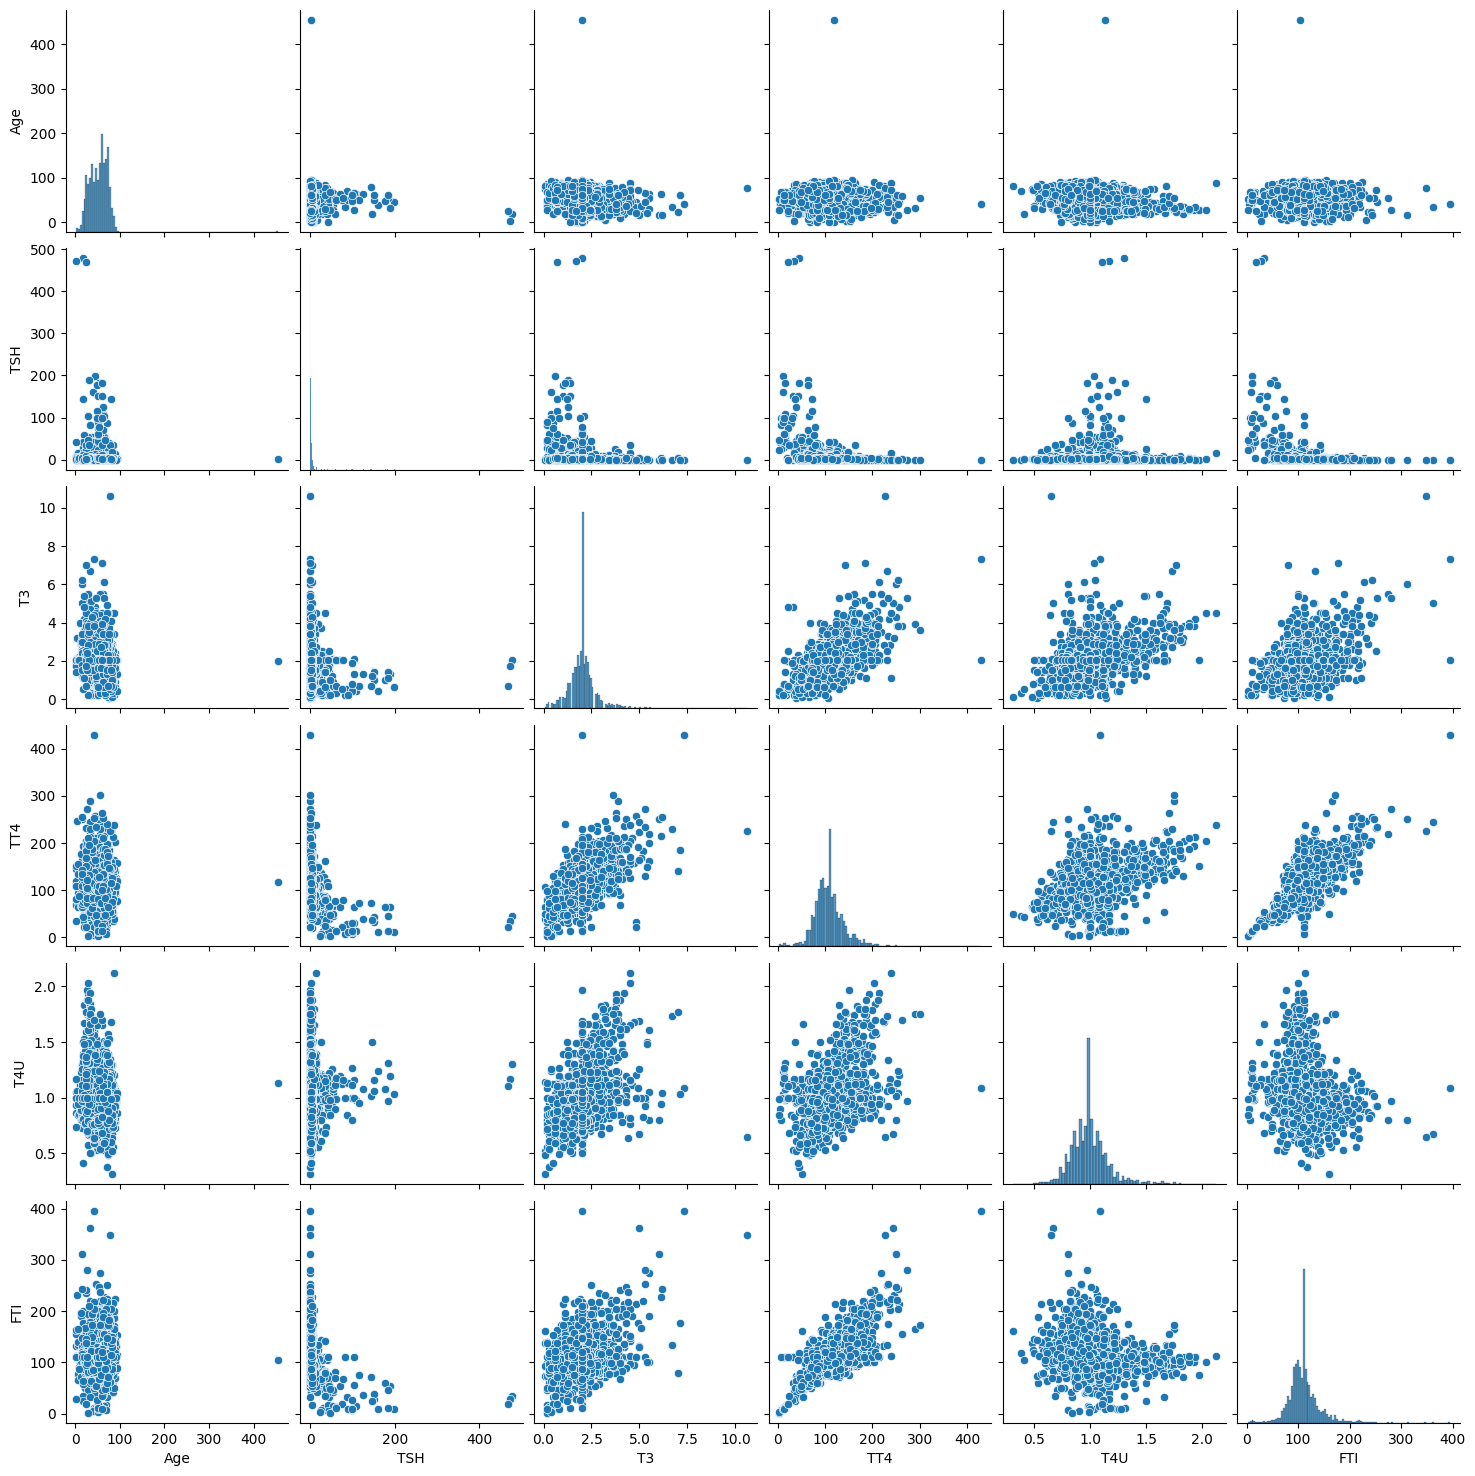

In [ ]:
import seaborn as sns
sns.pairplot(dataset)

Let's now see the final summary statistics for our (numerical) data using `describe()`.

In [ ]:
dataset[numeric_columns].describe()

,Age,TSH,T3,TT4,T4U,FTI
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,51.844230,4.672150,2.024966,109.072401,0.997912,110.787984
std,20.457505,20.332171,0.733383,34.209359,0.183788,31.102848
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,36.000000,0.597500,1.700000,89.000000,0.890000,95.000000
50%,54.000000,1.600000,2.024966,107.000000,0.997912,110.000000
75%,67.000000,3.700000,2.300000,123.000000,1.070000,122.000000
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000


Now let's take a look at our categorical columns! Try `pandas.unique()` or `pandas.value_counts(dropna=False)`.

In [ ]:
for col in categorical_columns:
    print(col, ": ", pd.unique(dataset[col]))

Sex :  ['F' 'M' nan]
On Thyroxine :  ['f' 't']
Query on Thyroxine :  ['f' 't']
On Antithyroid Medication :  ['f' 't']
Sick :  ['f' 't']
Pregnant :  ['f' 't']
Thyroid Surgery :  ['f' 't']
I131 Treatment :  ['f' 't']
Query Hypothyroid :  ['f' 't']
Query Hyperthyroid :  ['f' 't']
Lithium :  ['f' 't']
Goiter :  ['f' 't']
Tumor :  ['f' 't']
Hypopituitary :  ['f' 't']
Psych :  ['f' 't']
TSH Measured :  ['t' 'f']
T3 Measured :  ['t' 'f']
TT4 Measured :  ['t' 'f']
T4U Measured :  ['t' 'f']
FTI Measured :  ['t' 'f']
Referral Source :  ['SVHC' 'other' 'SVI' 'STMW' 'SVHD']


Uh oh . . . We have several features that are non-informative (they only have a single value). We probably didn't notice this before because there were still `'?'` values in there, or perhaps when we threw out that 30% of our data, we got rid of some variation in these features. Let's just drop those columns.

Remember to remove these columns from your list of categorial columns.

In [ ]:
# Drop columns that do not contain useful information (all 2800 data points have the same value)
### YOUR CODE HERE
dataset.drop(['TSH Measured', 'T3 Measured', 'TT4 Measured', 'T4U Measured', 'FTI Measured'], axis=1, inplace=True)
categorical_columns = categorical_columns.drop(['TSH Measured', 'T3 Measured', 'TT4 Measured', 'T4U Measured', 'FTI Measured'])
categorical_columns

Index(['Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goiter', 'Tumor', 'Hypopituitary', 'Psych', 'Referral Source'],
      dtype='object')

We can convert categorical columns (i.e., True/False or Male/Female) into indicator values (0, 1) using a pretty nifty function: [pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).  

In [ ]:
# Convert categorical columns to indicator (0, 1) variables
### YOUR CODE HERE
dataset['Sex'].replace(to_replace=['M', 'F'], value=[0, 1], inplace=True)
lccols = ['On Thyroxine', 'Query on Thyroxine', 'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium', 'Goiter', 'Tumor', 'Hypopituitary', 'Psych']
for col in lccols:
    dataset[col].replace(to_replace=['f', 't'], value=[0, 1], inplace=True)
dataset

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Referral Source,Class
0,41.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.30000,2.500000,125.0,1.140000,109.000000,SVHC,negative
1,23.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,4.10000,2.000000,102.0,0.997912,110.787984,other,negative
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.98000,2.024966,109.0,0.910000,120.000000,other,negative
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0.16000,1.900000,175.0,0.997912,110.787984,other,negative
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0.72000,1.200000,61.0,0.870000,70.000000,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,2.70000,2.024966,155.0,1.050000,148.000000,SVI,negative
2796,73.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,4.67215,0.700000,63.0,0.880000,72.000000,other,negative
2797,75.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,4.67215,2.024966,147.0,0.800000,183.000000,other,negative
2798,60.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.40000,2.024966,100.0,0.830000,121.000000,other,negative


## Model training and selection

OK! I think we're ready to create and select some supervised learning models. To get the ball rolling, let's select `Age` and `Sex` as our explanatory features (and `Class` as the target feature, obviously).

We will split our data into training and testing sets in an **80-20** split, stratified by class distribution (`stratify=dataset['Class']`; this tries to keep the class distribution approximately equal for the training and test set). For consistency, let's use a random state of 0 (`random_state=0`).

In [ ]:
from sklearn.model_selection import train_test_split

### YOUR CODE HERE
X_cols = ['TSH','FTI', 'TT4', 'T3' ] #FTI T4U
y_col = 'Class'
X_train, X_test, y_train, y_test = train_test_split(dataset[X_cols], dataset[y_col], test_size=0.2, stratify=dataset[y_col], random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Let's train a **decision tree** model on our training data!

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc

# Define the model
### YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None, max_depth=5, min_samples_leaf=5)

# Fit the model to training data
### YOUR CODE HERE
decision_tree.fit(X_train, y_train)

#apply the model to validation data
y_val_pred = decision_tree.predict(X_val)

# Apply the model to test data
### YOUR CODE HERE
y_test_pred = decision_tree.predict(X_test)

Fantastic, we have just built a decision tree! Let's go see how well it performs.

## Model evaluation

### Zero Rule

To start, let's establish the baseline performance. This is important because it provides a starting point of comparison for later evaluation methods, like accuracy.

A good baseline model to use is the **Zero Rule algorithm**. In classification problems, it simply predicts the class value with the greatest number of instances each time.

In [ ]:
def zero_rule_algorithm_classification(y_train, y_test):
    vals, counts = np.unique(y_train, return_counts=True)
    most_common = vals[np.argmax(counts)]
    
    v, c = np.unique(y_test, return_counts=True)
    return dict(zip(v, c))[most_common] / len(y_test)

Get your baseline performance by calculating the accuracy of your Zero Rule algorithm.

In [ ]:
zero_rule_algorithm_classification(y_train, y_val)

0.9285714285714286

Hm, so maybe accuracy isn't the best performance measure for this dataset. As you've seen already, even when the models predict "negative" for all the records, we could already achieve a ~92% accuracy. Using such a model, however, would imply that we incorrectly predict all cases to be positive, which in the context of this problem is fatal.

Thankfully, accuracy isn't the only way to evaluate your model. Let's take a look at a **confusion matrix**.

### Confusion matrix
![confusion_matrix2.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/confusion_matrix2.png)

Create a confusion matrix using the predictions of the decision tree model you built earlier.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def cm_metric(y_true,y_val_predict):
    # Calculate the confusion matrix
    ### YOUR CODE HERE
    cm = confusion_matrix(y_true, y_val_predict)
    return cm

cm_metric(y_test, y_test_pred)
# so we're just predicting everything as negative

array([[ 31,   0,   0],
       [ 11, 505,   0],
       [  1,   0,  12]])

### Area under ROC curve

Yet another appropriate metric is the **Area Under the Receiver Operating Characteristic curve**. Specifically, the diagnostic performance of a test, or the accuracy of a test to discriminate diseased cases from normal cases, is evaluated using **Receiver Operating Characteristic** (ROC) curve analysis.

When you consider the results of a particular test in two populations, one population with a disease and the other without the disease, you will rarely observe a perfect separation between the two groups. Hence, there exists an overlap as in the diagram below (which creates **false negatives** and **false positives**).

![roc_overlap.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/roc_overlap.png)

In a Receiver Operating Characteristic (ROC) curve, the **true positive rate** (sensitivity; $\frac {TP} {TP+FN}$) is plotted against the **false positive rate** (1 - specificity; $\frac {TN} {TN+FP}$) for different cutoff points. Each point on the ROC curve represents a TPR/FPR pair corresponding to a particular decision threshold. A test with perfect discrimination (no overlap in the two distributions) has an ROC curve that passes through the upper left corner (100% TPR, 100% FPR). Therefore, the closer the ROC curve is to the *upper-left* corner, the higher the overall accuracy of the test.

![tpr_vs_fpr.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/tpr_vs_fpr.png)

Now, let's calculate the area under the ROC curve with your predictions. Here, we will need the predicted probabilities of choosing a specific class value (`y_val_proba`) rather than the class value (`y_val_predict`) itself.

In [ ]:
from sklearn import metrics
#y_val_prob = decision_tree.predict_proba(X_val)

#fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

#roc_auc = metrics.roc_auc_score(y_val, y_val_prob[:,1])
#print(roc_auc)

Now graph the ROC curve, fully labeled, using Matplotlib.

In [ ]:
import matplotlib.pyplot as plt
'''
### YOUR CODE HERE
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
'''
cm = metrics.confusion_matrix(y_val, y_val_pred)
print(cm)

[[ 26   0   0]
 [  5 410   1]
 [  0   0   6]]


In conclusion, it looks like this model performed pretty badly. Not unexpected, though, since we're only using 2 features! Looking on the bright side, there's a lot of room for improvement!  Try using more features and different models, and see if you can do anything about that 30% of the data we threw out earlier.

In [ ]:
dataset

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Referral Source,Class
0,41.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.30000,2.500000,125.0,1.140000,109.000000,SVHC,negative
1,23.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,4.10000,2.000000,102.0,0.997912,110.787984,other,negative
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.98000,2.024966,109.0,0.910000,120.000000,other,negative
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0.16000,1.900000,175.0,0.997912,110.787984,other,negative
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0.72000,1.200000,61.0,0.870000,70.000000,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,2.70000,2.024966,155.0,1.050000,148.000000,SVI,negative
2796,73.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,4.67215,0.700000,63.0,0.880000,72.000000,other,negative
2797,75.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,4.67215,2.024966,147.0,0.800000,183.000000,other,negative
2798,60.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.40000,2.024966,100.0,0.830000,121.000000,other,negative


In [ ]:
(lambda: DeepnoteChart(dataset, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"scale":{"type":"linear"},"aggregate":"count"},"y":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Class","scale":{"type":"linear"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(dataset, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"scale":{"type":"linear"},"aggregate":"count"},"y":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Class","scale":{"type":"linear"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm = SVC(gamma = 0.01, C=10)
svm.fit(X_train, y_train)
 
y_train_pred=svm.predict(X_train)
print("Training Accuracy is", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
print("Validation Accuracy is", accuracy_score(y_val,y_val_pred)*100)

scores = cross_val_score(svm, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(scores.std()))

cm = metrics.confusion_matrix(y_val, y_val_pred)
print(cm)

Training Accuracy is 99.55357142857143
Validation Accuracy is 94.41964285714286
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
Cross-validation scores: [0.95555556 0.95555556 0.94413408 0.96089385 0.97206704 0.94972067
 0.94413408 0.94972067 0.93854749 0.94972067]
Average cross-validation score: 0.95
Standard deviation of cross-validation scores: 0.01
[[ 10  16   0]
 [  4 411   1]
 [  0   4   2]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)
y_val_pred = random_forest.predict(X_val)
y_train_pred = random_forest.predict(X_train)
print("Training Accuracy is", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is", accuracy_score(y_val,y_val_pred)*100)


random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)
scores = cross_val_score(random_forest, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(scores.std()))

y_test_pred = random_forest.predict(X_test)
print("Testing Acccuracy is", accuracy_score(y_test, y_test_pred)*100)

cm = metrics.confusion_matrix(y_val, y_val_pred)
print(cm)

Training Accuracy is 100.0
Validation Accuracy is 98.66071428571429
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
Cross-validation scores: [0.98333333 0.97777778 0.96089385 0.96648045 0.97206704 0.97206704
 0.98324022 0.97765363 0.98882682 0.95530726]
Average cross-validation score: 0.97
Standard deviation of cross-validation scores: 0.01
Testing Acccuracy is 97.32142857142857
[[ 25   1   0]
 [  4 411   1]
 [  0   0   6]]


## Submitting your model

Once you believe to have found the best classifier, run your classifier on the test data and make a `.pkl` file containing your predictions in a Pandas DataFrame.

This DataFrame will contain 3 columns for your binary classifier (or 5 columns for the multiclass classifier): the first column should be your model's "best guess" for each patient (either 0 or 1, negative or positive) and the last two columns should be the probability the patient would be classified as either a 0 or 1.

Here is an example:
|   | Prediction | 0 | 1   |
|---|---|---|------|
| 0 | 0 | $p_{0,0}$ | $p_{0,1}$|
| 1 | 1 | $p_{1,0}$ | $p_{1,1}$|
| 2 | 1 | $p_{2,0}$ | $p_{2,1}$|
| ... | ... | ... | ...|
| N | 0 | $p_{N,0}$ | $p_{N,1}$|

where $p_{i,j}$ corresponds to the probability of data point $i$ belonging to class $j$.

Here's an example of pickling a DataFrame (saving a `.pkl` file):

In [ ]:
# After running this cell, you should see the pkl file pop up in the file explorer to the left
# Use the three dots next to the filename to download the file
# After downloading the pkl file, email it to the Medlytics staff email

import pickle
predictions = pd.DataFrame({"guesses":[0, 1, 0, 1],"prob_neg":[.75, .15, .63, .20],"prob_pos":[.25, .85, .27, .80]})
prediction_pickle_path = 'team#_week1_v1.pkl'

# Create a variable to pickle and open it in write mode
prediction_pickle = open(prediction_pickle_path, 'wb')
pickle.dump(predictions, prediction_pickle)

prediction_pickle.close()

In [ ]:
prediction_unpickle = open(prediction_pickle_path, 'rb')
 
# Load the unpickled object into a variable
predictions = pickle.load(prediction_unpickle)
 
print(predictions)

   guesses  prob_neg  prob_pos
0        0      0.75      0.25
1        1      0.15      0.85
2        0      0.63      0.27
3        1      0.20      0.80


We will compare your predictions with the true classifications to score your model.

Let's check our full path to see where the pkl file was saved:

In [ ]:
pwd

'/'

## Scoring your model

Navigate to Week 1 in the Medlytics challenge project [**evaluator app**](https://medlytics-evaluator.streamlit.app/) to score your model. (Wake it up if it's asleep!)

#### Modeling considerations:
- You will receive a certain number of points for each correct classification and a certain point penalty for each incorrect classification. The points are weighted and designed to equate to -1 in a Zero Rule baseline model. This point scheme is designed to punish you heavily for predicting false positives (FP) and false negatives (FN)—FN cases especially. In doing so, we hope you see the importance of **clinical considerations** and treat your models from a more **human perspective**, rather than be detached from it.
- Similar to the confusion matrix, we want you to keep in mind the other aspects of healthcare analytics—in this case, **economic feasibility**. In essence, we want you to minimize the amount of time and money spent on data collection by reducing the number of features collected. Each record certainly required a lot of time and money from several individuals and businesses to reliably create, and we hope you gain a better understanding of conducting a useful cost-benefit analysis with this scoring method. The full details of the weighted features can be found in the GitHub.

## Presenting your model

Finally, we would like you to be able to present your model to the class. Prepare a presentation with the following things:

* **Features Chosen:** a list of the features used in your model, and an explanation of how you chose them.
* **Type of Model:** an explanation of the model type, parameters used, and why.
* **Evaluation:** at least one plot showing an evaluation of your model against a validation set. You can use a confusion matrix, AUROC, and/or another metric of your choice.

Feel free to include one or two additional plots that describe your process and/or model if you think that would be helpful.

## Moving to the next level

For those who finish early, remember how I converted the class values into simply "negative" and "positive"? Now try tackling the **multiclass** classifier (predicting the different types of positive hypothyroid cases instead of simply negative or positive)! 

The same rules apply! (Note: for the multiclass problem, the AUROC calculation will be the micro-average over your classes.)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c4658b3c-b10e-4ccd-a6b7-9c9a4ab225c2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>